# Humpback Whale Classification

In [1]:
from PIL import Image
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


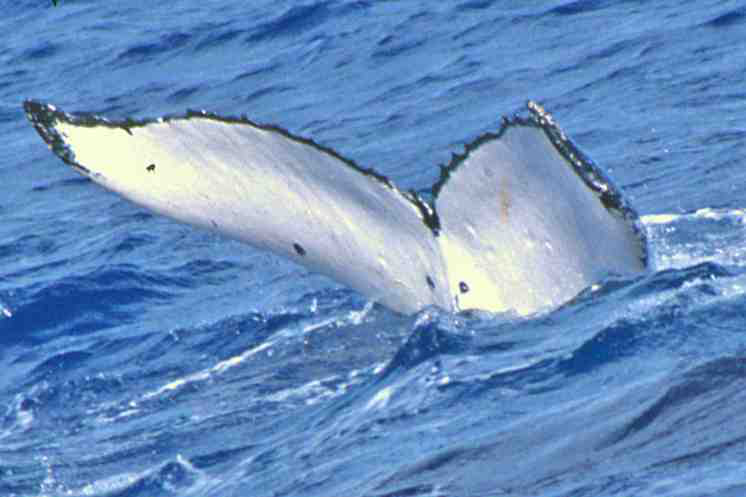

In [2]:
train_csv = 'C:\\Users\\Albert\\.kaggle\\competitions\\whale-categorization-playground\\train.csv'
image_dir = 'C:\\Users\\Albert\\.kaggle\\competitions\\whale-categorization-playground\\train\\train\\'
im = '00aa021c.jpg'

Image.open(image_dir + '\\' + im)

In [3]:
with open(train_csv, 'r') as f:
    files = f.read().split('\n')

In [4]:
df = pd.DataFrame([x.split(',') for x in files])
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df[df['Image']!='']

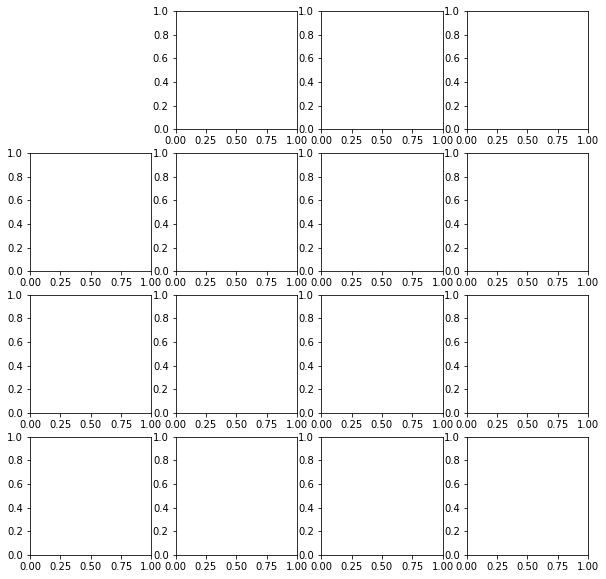

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [30]:
nr = 4
nc = 4
fig, axes = plt.subplots(nrows = nr, ncols = nc, figsize=(10,10))
for i in range(nc * nr):
    row = i // nc
    col = i % nc
    axes[row, col].axis('off')
    axes[row, col].imshow(Image.open(image_dir + df['Image'].iloc[i]))
    
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.show()
    

In [13]:
from collections import Counter
image_counter = Counter(df['Id'])
image_counter.most_common(10)

[('new_whale', 810),
 ('w_1287fbc', 34),
 ('w_98baff9', 27),
 ('w_7554f44', 26),
 ('w_1eafe46', 23),
 ('w_fd1cb9d', 22),
 ('w_693c9ee', 22),
 ('w_ab4cae2', 22),
 ('w_73d5489', 21),
 ('w_43be268', 21)]

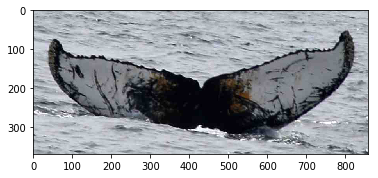

In [15]:
import matplotlib.pyplot as plt

def display_image(file_name):
    im = Image.open(image_dir + file_name)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

display_image(df['Image'].iloc[20])

In [6]:
from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(img_path, rescale = None):
    # Load RGB image as PIL.Image
    # Check if rescaling all images
    if rescale:
        width, height = rescale
        img = image.load_img(img_path, target_size = (width, height))
    else:
        img = image.load_img(img_path)
    # convert PIL image into 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor
    return np.expand_dims(x, axis = 0)

def paths_to_tensor(img_paths, rescale = None):
    list_of_tensors = [path_to_tensor(img_path, rescale) for img_path in img_paths]
    return np.vstack(list_of_tensors)

In [9]:
full_paths = list(map(lambda x: image_dir + x, df['Image']))
tensor_data = paths_to_tensor(full_paths, reshape=(64,64))
tensor_data.shape

(9850, 64, 64, 3)

In [15]:
num_classes = len(image_counter)

In [24]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, GlobalAveragePooling2D

def whale_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=2, activation='relu', input_shape = (64,64,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.2))
    model.add(Conv2D(32, kernel_size=2, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.2))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes))
    
    return model

In [25]:
my_model = whale_model()
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 63, 63, 64)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
__________

In [26]:
from keras.metrics import top_k_categorical_accuracy
from functools import partial

top_5_categorical = partial(top_k_categorical_accuracy, k = 5)
top_5_categorical.__name__ = 'top_5_categorical'

my_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = [top_5_categorical])

In [33]:
from sklearn.preprocessing import LabelBinarizer

X = df['Image']
y = df['Id']

encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(df['Id'])
y_onehot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])